In [17]:
import pandas as pd
from importlib import reload
import paper_handler as ph
reload(ph)
import json

In [18]:
classifier = ph.NaiveBayes(ph.getwords, reset_db=True, password='1qaz')

In [19]:
papers = json.load(open('tagged_papers.json'))
import random
random.shuffle(papers)
interactive = True
for p in papers:
    title = p['title']
    abstract = p['abstract']
    txt= f"{title}\n{abstract}\n\n"
    tag = p.get('tag', '???')
    prediction, prediction_score = classifier.classify(p)
    if interactive:
        resp = input(f'{txt} <tag: {tag}, prediction: {prediction} {prediction_score:.2f}> ===> ')
        tag = None
        if resp == 'l':
            tag = 'language'
        elif resp == 's':
            tag = 'snake'
        elif resp == 'q':
            interactive = False
            tag = p.get('tag', '???')
    if tag not in('???', None):
        classifier.train(p, tag)

Bioalerts: a python library for the derivation of structural alerts from bioactivity and toxicity data sets.
Assessing compound toxicity at early stages of the drug discovery process is a crucial task to dismiss drug candidates likely to fail in clinical trials. Screening drug candidates against structural alerts, i.e. chemical fragments associated to a toxicological response prior or after being metabolized (bioactivation), has proved a valuable approach for this task. During the last decades, diverse algorithms have been proposed for the automatic derivation of structural alerts from categorical toxicity data sets.

 <tag: language, prediction: None -inf> ===> l


/Users/boris/devel/data_processing_and_analysis/notebooks/04_TextClassifier/paper_handler.py:15: FutureWarning: split() requires a non-empty pattern match.
  words = [s.lower() for s in splitter.split(doc)


TRAL: tandem repeat annotation library.
Currently, more than 40 sequence tandem repeat detectors are published, providing heterogeneous, partly complementary, partly conflicting results.

 <tag: language, prediction: language 0.00> ===> l
The Medical Imaging Interaction Toolkit: challenges and advances : 10 years of open-source development.
The Medical Imaging Interaction Toolkit (MITK) has been available as open-source software for almost 10 years now. In this period the requirements of software systems in the medical image processing domain have become increasingly complex. The aim of this paper is to show how MITK evolved into a software system that is able to cover all steps of a clinical workflow including data retrieval, image analysis, diagnosis, treatment planning, intervention support, and treatment control.

 <tag: language, prediction: language 0.00> ===> l
Interactive network visualization in Jupyter notebooks: visJS2jupyter.
Network biology is widely used to elucidate mech

In [20]:
len(papers)

496

In [21]:
classifier.classify(papers[0])

/Users/boris/devel/data_processing_and_analysis/notebooks/04_TextClassifier/paper_handler.py:15: FutureWarning: split() requires a non-empty pattern match.
  words = [s.lower() for s in splitter.split(doc)


('language', 4.6813366320962935)

In [33]:
scores = {
    'language': [],
    'snake': []
}
for p in papers[0:300]:
    score = classifier.classify(p)[1]
    scores[p['tag']].append(score)
    if score < 0.2:
        print(p['title'], p['tag'], score)
    

/Users/boris/devel/data_processing_and_analysis/notebooks/04_TextClassifier/paper_handler.py:15: FutureWarning: split() requires a non-empty pattern match.
  words = [s.lower() for s in splitter.split(doc)


Myokit: A simple interface to cardiac cellular electrophysiology. snake 0.179120134588
ParamAP: Standardized Parameterization of Sinoatrial Node Myocyte Action Potentials. snake 0.0569057654696
Stratification of inspired air in the elongated lungs of the carpet python, Morelia spilotes variegata. snake 0.13714363418
The role of nitric oxide in regulation of the cardiovascular system in reptiles. snake 0.190978014741
Multiple papillomas in a diamond python, Morelia spilota spilota. snake 0.00833994391889


In [28]:
from matplotlib import pylab as plt
%matplotlib inline

Text(0.5,1,'snake')

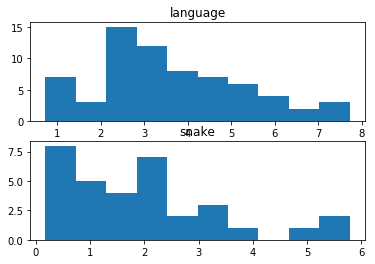

In [30]:
fig, axes = plt.subplots(2, 1)
axes[0].hist(scores['language']); axes[0].set_title('language')
axes[1].hist(scores['snake']); axes[1].set_title('snake')

In [31]:
min(scores['snake'])

0.17912013458825093

In [5]:
import re
re.sub(r'\W', '', 'ab-c')

'abc'

In [6]:
import MySQLdb

ModuleNotFoundError: No module named 'MySQLdb'

In [ ]:
import mysql.connector